In [1]:
#Import 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
csv_path = '../data/feature/feature.csv'
merged_df = pd.read_csv(csv_path)

# K-MEANS

In [89]:
features = ['Open', 'Volume', 'Volatility', 'Amplitude', 'Price_change', 'Volatility_ratio',
            'High_low_spread', 'RoC', 'ATR', 'RSI', 'VWAP', 'OBV']
            
data_clustering = merged_df[features]

In [200]:
# Elbow Method
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_clustering)
    inertia.append(kmeans.inertia_)

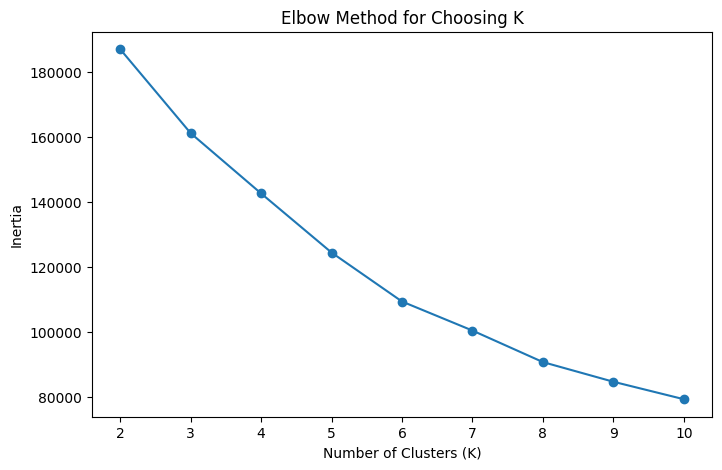

In [201]:
# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')
plt.show()


In [237]:
# Choice of optimal K (based on inertia)
optimal_k = 3  

# K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(data_clustering)
data_clustering['cluster'] = kmeans.labels_

# Silouhette Score
silhouette_avg = silhouette_score(data_clustering, kmeans.labels_)

C:\Users\33615\AppData\Local\Temp\ipykernel_6316\727384551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['cluster'] = kmeans.labels_


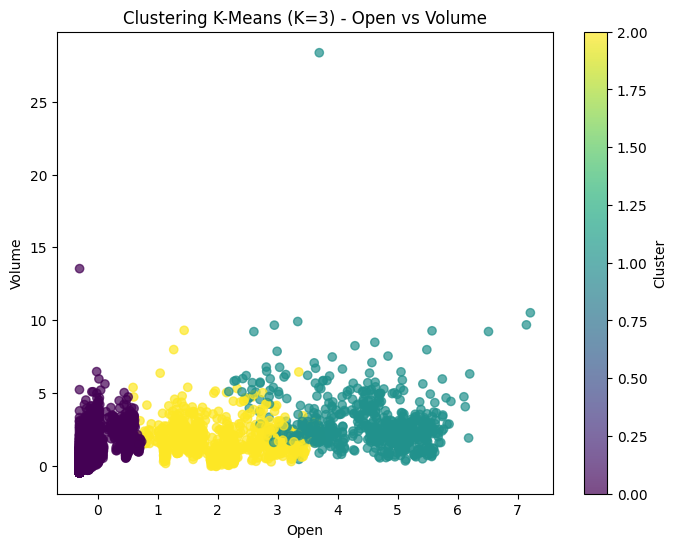

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(data_clustering['Open'], data_clustering['Volume'], c=data_clustering['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title(f'Clustering K-Means (K={optimal_k}) - Open vs Volume')
plt.colorbar(label='Cluster')
plt.show()